## Random forest implementation (bagging)

It's an ensemble of decision tress.

There are 3ways to create bootstrap sample: row sampling[with or without replacement], column sampling, combination of both row and column sampling

Aggregation:
classification: majority
regression: averaging

In [34]:
import  numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [35]:
X,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)


In [36]:
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y

In [37]:
df.shape

(100, 6)

In [38]:
df.head()

,col1,col2,col3,col4,col5,target
0,0.561815,-0.497862,-1.095015,-0.359719,-0.569279,0
1,0.739283,-1.079277,0.363442,0.635368,0.363390,0
2,-0.483197,0.167434,-0.327319,1.830606,-0.297755,1
3,1.369781,-0.448637,0.967102,-0.802080,1.484549,0
4,1.377838,-0.642021,2.498987,0.822581,2.701181,0


In [39]:
#row sampling function
def row_samples(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)


In [40]:
#feature sampling function
import random
def column_samples(df,percent):
    cols=random.sample(df.columns.tolist()[:-1],int(percent*df.shape[1]))
    return df[cols]

In [41]:
#combined sampling
def combined_samplinf(df,row_percent,col_percent):
    new_df=row_samples(df,row_percent)
    return column_samples(new_df,col_percent)

In [42]:
df1=row_samples(df,0.1)
df2=row_samples(df,0.1)
df3=row_samples(df,0.1)

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()


In [44]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.8333333333333334, 'x[0] <= -0.416\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= -0.954\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

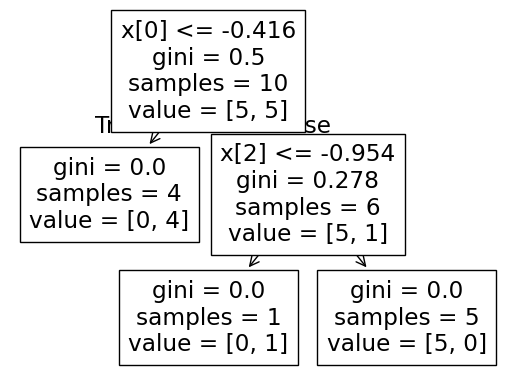

In [45]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.5, 0.75, 'x[0] <= 0.628\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.625, 0.5, '  False')]

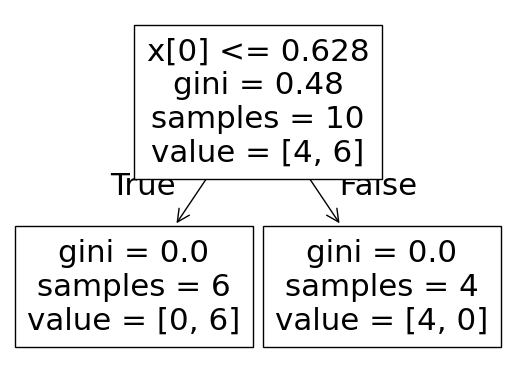

In [46]:
plot_tree(clf2)


[Text(0.5, 0.75, 'x[2] <= -0.049\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.625, 0.5, '  False')]

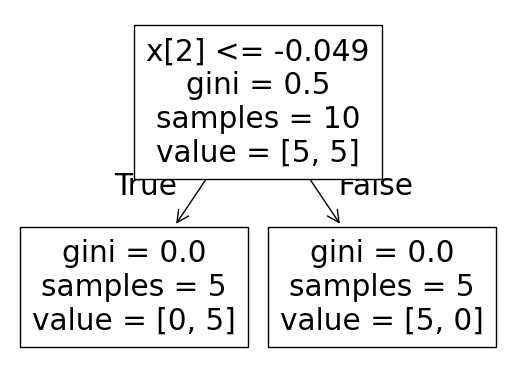

In [47]:
plot_tree(clf3)

In [48]:
clf1.predict(np.array([1.377838,	-0.642021,	2.498987,	0.822581,2.701181]).reshape(1,5))

c:\Users\Raj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [49]:
clf2.predict(np.array([1.377838,	-0.642021,	2.498987,	0.822581,2.701181]).reshape(1,5))

c:\Users\Raj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [50]:
clf3.predict(np.array([1.377838,	-0.642021,	2.498987,	0.822581,2.701181]).reshape(1,5))

c:\Users\Raj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

since all the models are predicting it as class 0 so outcome will be 0 [majority]